# Aaron Tan
## Mini Project 1 - Drug Overdose Deaths US Dataset

Import all the python libraries required for this project

In [1]:
import pandas as pd
import requests
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame
from folium.features import GeoJsonTooltip
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm


# 1. Data Inspection and EDA Process:

In [2]:
# Read the CSV file
# Reference: https://www.kaggle.com/datasets/joebeachcapital/drug-overdose-deaths

df = pd.read_csv("drug_dataset/drug.csv")
df.head(6)

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Heroin (T40.1),NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,Psychostimulants with abuse potential (T43.6),NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Natural & semi-synthetic opioids (T40.2),NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
5,AK,2015,April,12 month-ending,Methadone (T40.3),NaN,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN


## 1.1 Understanding Data Structure of this df

In [3]:
# 12 columns and 59400 rows
df.shape

(59400, 12)

In [4]:
df.columns

Index(['State', 'Year', 'Month', 'Period', 'Indicator', 'Data Value',
       'Percent Complete', 'Percent Pending Investigation', 'State Name',
       'Footnote', 'Footnote Symbol', 'Predicted Value'],
      dtype='object')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          59400 non-null  object 
 1   Year                           59400 non-null  int64  
 2   Month                          59400 non-null  object 
 3   Period                         59400 non-null  object 
 4   Indicator                      59400 non-null  object 
 5   Data Value                     48443 non-null  object 
 6   Percent Complete               59400 non-null  float64
 7   Percent Pending Investigation  59400 non-null  float64
 8   State Name                     59400 non-null  object 
 9   Footnote                       54153 non-null  object 
 10  Footnote Symbol                54000 non-null  object 
 11  Predicted Value                38197 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usag

In [6]:
# Checking if there is any null data in one of these columns:
print(df.isnull().sum())

State                                0
Year                                 0
Month                                0
Period                               0
Indicator                            0
Data Value                       10957
Percent Complete                     0
Percent Pending Investigation        0
State Name                           0
Footnote                          5247
Footnote Symbol                   5400
Predicted Value                  21203
dtype: int64


In [7]:
df = df.sort_values(by="Year", ascending=True)

In [8]:
# Define all months
all_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Filter for 2021-2023
df_filtered = df[df["Year"].isin([2021, 2022, 2023])]

# Get unique months for each year
unique_months = df_filtered.groupby("Year")["Month"].unique()

# Check missing months
for year, months in unique_months.items():
    missing = set(all_months) - set(months)
    if missing:
        print(f"{year}: Missing months → {sorted(missing)}")
    else:
        print(f"{year}: All months recorded")

# for 2022 and 2023, all the mths are not included

2021: All months recorded
2022: All months recorded
2023: Missing months → ['April', 'August', 'December', 'July', 'June', 'May', 'November', 'October', 'September']


In [9]:
# Drop all na values. Think of the way to minimise drop N/A values 
df = df.dropna()
print(df.isnull().sum())

State                            0
Year                             0
Month                            0
Period                           0
Indicator                        0
Data Value                       0
Percent Complete                 0
Percent Pending Investigation    0
State Name                       0
Footnote                         0
Footnote Symbol                  0
Predicted Value                  0
dtype: int64


In [10]:
# Get only columns that are relevant to this project:
# Drop unwanted columns
df_new = df.drop(columns=["Period", "Percent Complete", "Footnote", "Footnote Symbol"])

print(df_new.columns)


Index(['State', 'Year', 'Month', 'Indicator', 'Data Value',
       'Percent Pending Investigation', 'State Name', 'Predicted Value'],
      dtype='object')


In [11]:
# Convert "Data Value" to integer safely
df_new["Data Value"] = pd.to_numeric(df_new["Data Value"], errors="coerce").fillna(0).astype(int)

In [12]:
print(df_new.isnull().sum())

State                            0
Year                             0
Month                            0
Indicator                        0
Data Value                       0
Percent Pending Investigation    0
State Name                       0
Predicted Value                  0
dtype: int64


In [13]:
df.shape

(33656, 12)

In [14]:
# Rename columns
df_new = df_new.rename(columns={
    "Data Value": "Actual Deaths",
    "Predicted Value": "Predicted Deaths"
})

# Preview the changes
print(df_new.isnull().sum())

State                            0
Year                             0
Month                            0
Indicator                        0
Actual Deaths                    0
Percent Pending Investigation    0
State Name                       0
Predicted Deaths                 0
dtype: int64


In [15]:
# Note that predicted deaths are the same as actual deaths so we can drop this:
df_new = df_new.drop(columns=["Predicted Deaths"])

print(df_new.columns)


Index(['State', 'Year', 'Month', 'Indicator', 'Actual Deaths',
       'Percent Pending Investigation', 'State Name'],
      dtype='object')


In [16]:
df_new.shape

(33656, 7)

In [17]:
# Preview the changes
print(df_new.isnull().sum())

State                            0
Year                             0
Month                            0
Indicator                        0
Actual Deaths                    0
Percent Pending Investigation    0
State Name                       0
dtype: int64


In [18]:
df_new = df_new.sort_values(by="Year", ascending=True)

In [19]:
# Save df_new to a CSV file
df_new.to_csv("drug_dataset/new_drug.csv", index=False)

In [20]:
df_new.describe()

,Year,Actual Deaths,Percent Pending Investigation
count,33656.000000,33656.000000,33656.000000
mean,2018.712295,214.286843,0.118886
std,2.205712,241.774593,0.157313
min,2015.000000,0.000000,0.000000
25%,2017.000000,21.000000,0.018297
50%,2019.000000,117.000000,0.057188
75%,2020.000000,340.000000,0.150610
max,2023.000000,999.000000,1.632556


## 1.2 Begin Visualisation and Finding Insights:

Using the new dataset after data clean and unncessary columns removed we can start the analysis

In [21]:
df_drug = pd.read_csv("drug_dataset/new_drug.csv")
df_drug.head(2)

,State,Year,Month,Indicator,Actual Deaths,Percent Pending Investigation,State Name
0,IL,2015,September,Natural & semi-synthetic opioids (T40.2),253,0.026614,Illinois
1,ME,2015,December,Cocaine (T40.5),32,0.000000,Maine


In [22]:
df_drug.shape

(33656, 7)

In [23]:
# Get GeoJSON data
state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

In [24]:
agg = (
    df_drug.groupby(["Year", "State Name"], as_index=False)["Actual Deaths"]
           .sum()
           .rename(columns={"Actual Deaths": "Total Actual Deaths"})
)

In [25]:
# Region mapping (only used if Region col not already present)
STATE_TO_REGION = {
    # Northeast
    "Maine":"Northeast","New Hampshire":"Northeast","Vermont":"Northeast","Massachusetts":"Northeast",
    "Rhode Island":"Northeast","Connecticut":"Northeast","New York":"Northeast","New Jersey":"Northeast",
    "Pennsylvania":"Northeast",
    # Midwest
    "Ohio":"Midwest","Indiana":"Midwest","Illinois":"Midwest","Michigan":"Midwest","Wisconsin":"Midwest",
    "Minnesota":"Midwest","Iowa":"Midwest","Missouri":"Midwest","North Dakota":"Midwest","South Dakota":"Midwest",
    "Nebraska":"Midwest","Kansas":"Midwest",
    # South
    "Delaware":"South","Maryland":"South","District of Columbia":"South","Virginia":"South","West Virginia":"South",
    "North Carolina":"South","South Carolina":"South","Georgia":"South","Florida":"South",
    "Kentucky":"South","Tennessee":"South","Mississippi":"South","Alabama":"South",
    "Oklahoma":"South","Texas":"South","Arkansas":"South","Louisiana":"South",
    # West
    "Idaho":"West","Montana":"West","Wyoming":"West","Nevada":"West","Utah":"West","Colorado":"West",
    "Arizona":"West","New Mexico":"West","Alaska":"West","Washington":"West","Oregon":"West","California":"West",
    "Hawaii":"West", "Ulah":'West', "Colorado":"West"
}

In [26]:

# ===============================
# HELPER FUNCTIONS
# ===============================
def create_map_for_year(year):
    """Build a Folium map for a given year with hover tooltip + region-colored borders."""
    data_for_year = agg[agg["Year"] == year].copy()

    # Lookups
    death_lookup  = dict(zip(data_for_year["State Name"], data_for_year["Total Actual Deaths"]))

    m = folium.Map(location=[37.8, -96], zoom_start=4, tiles="cartodbpositron")

    # Choropleth by deaths
    choropleth = folium.Choropleth(
        geo_data=state_geo,
        data=data_for_year,
        columns=["State Name", "Total Actual Deaths"],
        key_on="feature.properties.name",
        fill_color="RdYlGn_r",
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f"Total Drug Overdose Deaths ({year})",
        highlight=True
    ).add_to(m)

    # Tooltip fields
    for feature in choropleth.geojson.data["features"]:
        state = feature["properties"]["name"]
        feature["properties"]["total_deaths"] = int(death_lookup.get(state, 0))

    folium.features.GeoJsonTooltip(
        fields=["name", "region", "total_deaths"],
        aliases=["State:", "Region (border color):", "Total Deaths:"],
        localize=True,
        sticky=True
    ).add_to(choropleth.geojson)



    return m

def top5_text_for_year(year):
    """Text summary of top 5 states by deaths."""
    top5 = (
        agg[agg["Year"] == year]
        .sort_values("Total Actual Deaths", ascending=False)
        .head(5).reset_index(drop=True)
    )
    lines = [f"Top 5 States for {year} (Total Deaths)"]
    for i, row in top5.iterrows():
        lines.append(f"{i+1}) {row['State Name']} — {int(row['Total Actual Deaths']):,} deaths")
    if len(top5) > 0:
        lines.append(f"\nHighest in {year}: {top5.loc[0, 'State Name']} ({int(top5.loc[0, 'Total Actual Deaths']):,})")
    return "\n".join(lines)

# ===============================
# WIDGETS
# ===============================
years = sorted(int(y) for y in agg["Year"].dropna().unique())
slider = widgets.IntSlider(
    value=years[0], min=years[0], max=years[-1], step=1,
    description="Year", continuous_update=False, readout=True
)
play = widgets.Play(interval=700, value=years[0], min=years[0], max=years[-1], step=1)
widgets.jslink((play, 'value'), (slider, 'value'))

out = widgets.Output()

def render(year):
    with out:
        clear_output(wait=True)
        m = create_map_for_year(year)
        display(m)
        print()
        print(top5_text_for_year(year))

render(slider.value)

def on_year_change(change):
    if change['name'] == 'value':
        render(change['new'])

slider.observe(on_year_change)

ui = widgets.HBox([play, slider])
display(ui, out)

Output()

In [27]:
# Use the current slider year (or set explicitly, e.g., YEAR = 2021)
YEAR = slider.value

# Ensure Region column exists
df = agg.copy()
if "Region" not in df.columns:
    df["Region"] = df["State Name"].map(STATE_TO_REGION)

# ---- Table 1: Top-5 states by deaths (with Region) for YEAR ----
top5_tbl = (
    df.loc[df["Year"] == YEAR, ["State Name", "Region", "Total Actual Deaths"]]
      .sort_values("Total Actual Deaths", ascending=False)
      .head(5)
      .reset_index(drop=True)
)
top5_tbl.index = top5_tbl.index + 1
top5_tbl = top5_tbl.rename(columns={
    "State Name": "State",
    "Region": "Region",
    "Total Actual Deaths": "Total Deaths"
})
top5_tbl["Total Deaths"] = top5_tbl["Total Deaths"].map(lambda x: f"{int(x):,}")

print(f"Top 5 States by Drug Overdose Deaths — {YEAR}")
display(top5_tbl)

# ---- Table 2: State → Region reference (unique list) ----
state_region_tbl = (
    df[["State Name", "Region"]]
    .drop_duplicates()
    .rename(columns={"State Name": "State"})
    .sort_values(["Region", "State"])
    .reset_index(drop=True)
)
print("State → Region Reference")
display(state_region_tbl)

Top 5 States by Drug Overdose Deaths — 2015


,State,Region,Total Deaths
1,Virginia,South,"41,421"
2,New York,Northeast,"39,584"
3,Maryland,South,"38,524"
4,New York City,NaN,"37,843"
5,West Virginia,South,"37,173"


State → Region Reference


,State,Region
0,Illinois,Midwest
1,Indiana,Midwest
2,Iowa,Midwest
3,Kansas,Midwest
4,Michigan,Midwest
5,Minnesota,Midwest
6,Missouri,Midwest
7,Nebraska,Midwest
8,North Dakota,Midwest
9,Ohio,Midwest


In [28]:
df.shape

(477, 4)

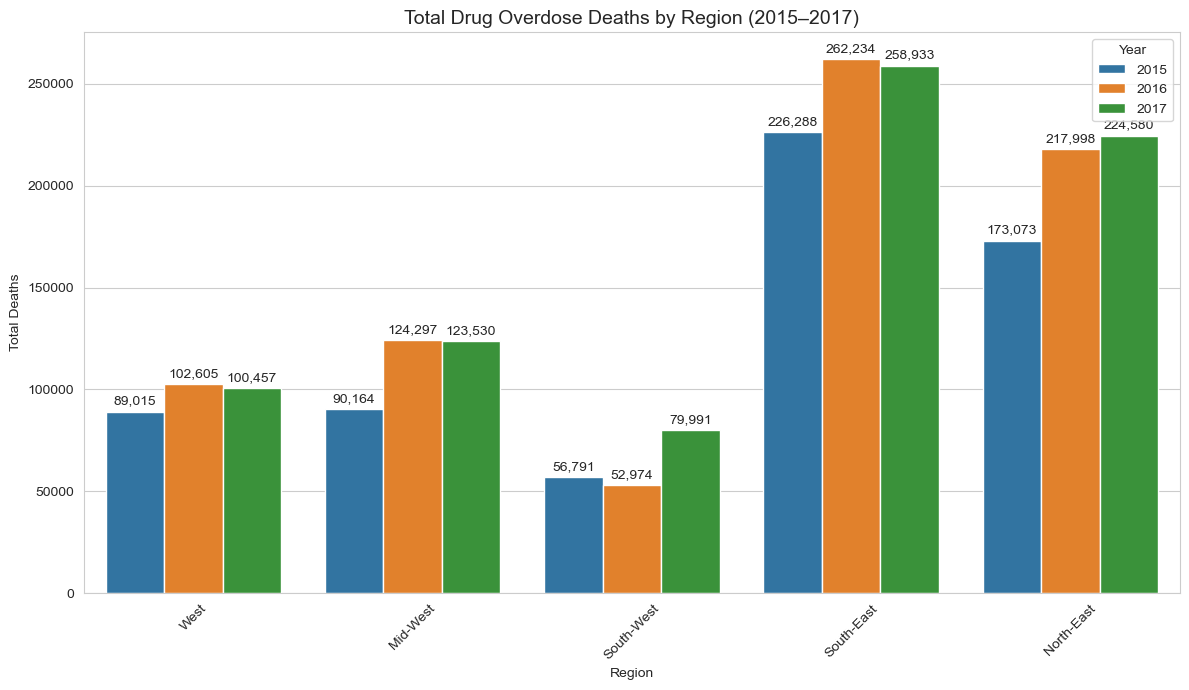

In [29]:
# ===============================
# Seaborn Bar Chart: Region Total Overdose Deaths (2015–2017) with Labels
# ===============================

# If your DataFrame is named something else, replace df below.
# Ensure df has columns: ["Year", "State Name", "Total Actual Deaths"]

STATE_TO_REGION = {
    # West
    "Washington":"West","Oregon":"West","California":"West","Nevada":"West","Idaho":"West","Montana":"West",
    "Wyoming":"West","Alaska":"West","Hawaii":"West",
    # Mid-West
    "North Dakota":"Mid-West","South Dakota":"Mid-West","Nebraska":"Mid-West","Kansas":"Mid-West",
    "Minnesota":"Mid-West","Iowa":"Mid-West","Missouri":"Mid-West","Wisconsin":"Mid-West",
    "Illinois":"Mid-West","Indiana":"Mid-West","Michigan":"Mid-West","Ohio":"Mid-West",
    # South-West
    "Arizona":"South-West","New Mexico":"South-West","Texas":"South-West","Oklahoma":"South-West",
    # South-East
    "Arkansas":"South-East","Louisiana":"South-East","Mississippi":"South-East","Alabama":"South-East",
    "Georgia":"South-East","Florida":"South-East","South Carolina":"South-East","North Carolina":"South-East",
    "Tennessee":"South-East","Kentucky":"South-East","Virginia":"South-East","West Virginia":"South-East",
    # North-East
    "Maine":"North-East","New Hampshire":"North-East","Vermont":"North-East","Massachusetts":"North-East",
    "Rhode Island":"North-East","Connecticut":"North-East","New York":"North-East","New Jersey":"North-East",
    "Pennsylvania":"North-East","Delaware":"North-East","Maryland":"North-East","District of Columbia":"North-East"
}

# 1) Region column
df = df.copy()
df["Region"] = df["State Name"].map(STATE_TO_REGION)

# 2) Filter and aggregate 2015–2017
df["Year"] = df["Year"].astype(int)
df_1517 = df[df["Year"].between(2015, 2017, inclusive="both")]

region_totals = (
    df_1517.groupby(["Year", "Region"], dropna=False)["Total Actual Deaths"]
           .sum()
           .reset_index()
)

# 3) Make Year a string for seaborn hue to avoid legend label issues
region_totals["Year"] = region_totals["Year"].astype(str)

# Optional: order regions
region_order = ["West", "Mid-West", "South-West", "South-East", "North-East"]
hue_order = ["2015", "2016", "2017"]

# 4) Plot
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax = sns.barplot(
    data=region_totals,
    x="Region", y="Total Actual Deaths", hue="Year",
    order=[r for r in region_order if r in region_totals["Region"].unique()],
    hue_order=[h for h in hue_order if h in region_totals["Year"].unique()],
    errorbar=None, dodge=True
)

# 5) Add value labels (thousands separated)
try:
    for container in ax.containers:
        ax.bar_label(container, fmt=lambda v: f"{int(v):,}", label_type="edge", padding=3)
except Exception:
    # Fallback for older Matplotlib: manual annotations
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{int(height):,}",
                        (p.get_x() + p.get_width()/2, height),
                        ha="center", va="bottom", fontsize=10, xytext=(0, 3),
                        textcoords="offset points")

plt.title("Total Drug Overdose Deaths by Region (2015–2017)", fontsize=14)
plt.ylabel("Total Deaths")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Year")
plt.show()


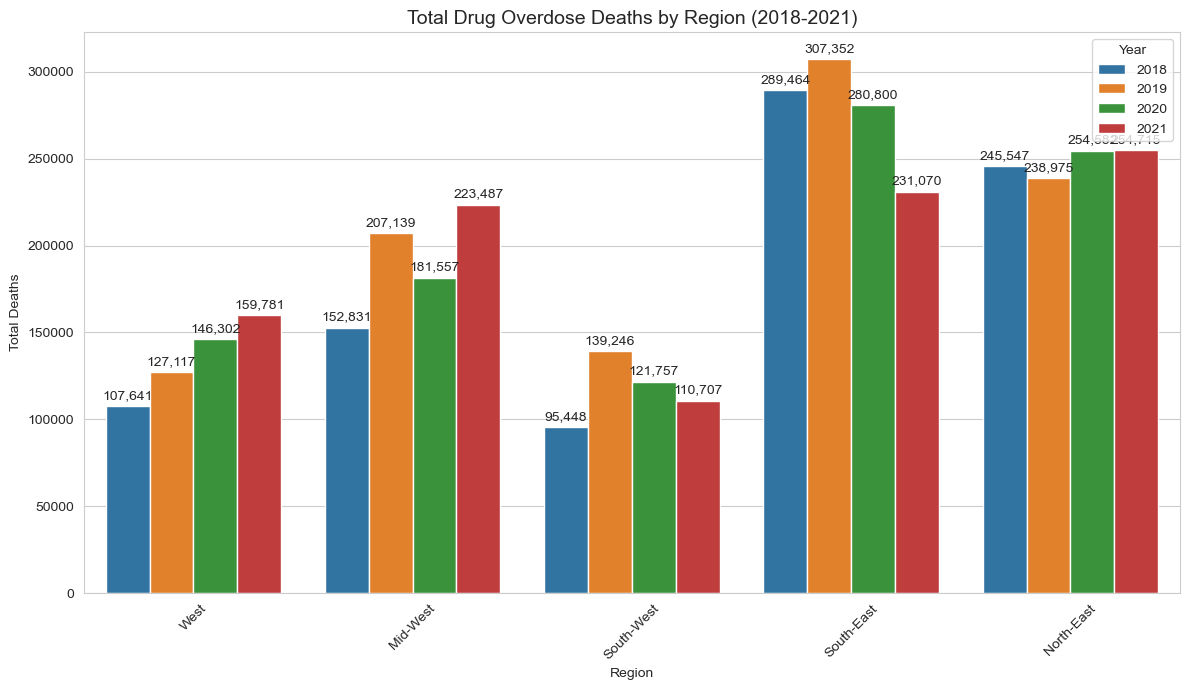

In [30]:
# ===============================
# Seaborn Bar Chart: Region Total Overdose Deaths (2018-2021) with Labels
# ===============================

# If your DataFrame is named something else, replace df below.
# Ensure df has columns: ["Year", "State Name", "Total Actual Deaths"]

STATE_TO_REGION = {
    # West
    "Washington":"West","Oregon":"West","California":"West","Nevada":"West","Idaho":"West","Montana":"West",
    "Wyoming":"West","Alaska":"West","Hawaii":"West",
    # Mid-West
    "North Dakota":"Mid-West","South Dakota":"Mid-West","Nebraska":"Mid-West","Kansas":"Mid-West",
    "Minnesota":"Mid-West","Iowa":"Mid-West","Missouri":"Mid-West","Wisconsin":"Mid-West",
    "Illinois":"Mid-West","Indiana":"Mid-West","Michigan":"Mid-West","Ohio":"Mid-West",
    # South-West
    "Arizona":"South-West","New Mexico":"South-West","Texas":"South-West","Oklahoma":"South-West",
    # South-East
    "Arkansas":"South-East","Louisiana":"South-East","Mississippi":"South-East","Alabama":"South-East",
    "Georgia":"South-East","Florida":"South-East","South Carolina":"South-East","North Carolina":"South-East",
    "Tennessee":"South-East","Kentucky":"South-East","Virginia":"South-East","West Virginia":"South-East",
    # North-East
    "Maine":"North-East","New Hampshire":"North-East","Vermont":"North-East","Massachusetts":"North-East",
    "Rhode Island":"North-East","Connecticut":"North-East","New York":"North-East","New Jersey":"North-East",
    "Pennsylvania":"North-East","Delaware":"North-East","Maryland":"North-East","District of Columbia":"North-East"
}

# 1) Region column
df = df.copy()
df["Region"] = df["State Name"].map(STATE_TO_REGION)

# 2) Filter and aggregate 2015–2017
df["Year"] = df["Year"].astype(int)
df_1517 = df[df["Year"].between(2018, 2021, inclusive="both")]

region_totals = (
    df_1517.groupby(["Year", "Region"], dropna=False)["Total Actual Deaths"]
           .sum()
           .reset_index()
)

# 3) Make Year a string for seaborn hue to avoid legend label issues
region_totals["Year"] = region_totals["Year"].astype(str)

# Optional: order regions
region_order = ["West", "Mid-West", "South-West", "South-East", "North-East"]
hue_order = ["2018", "2019", "2020", "2021"]

# 4) Plot
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
ax = sns.barplot(
    data=region_totals,
    x="Region", y="Total Actual Deaths", hue="Year",
    order=[r for r in region_order if r in region_totals["Region"].unique()],
    hue_order=[h for h in hue_order if h in region_totals["Year"].unique()],
    errorbar=None, dodge=True
)

# 5) Add value labels (thousands separated)
try:
    for container in ax.containers:
        ax.bar_label(container, fmt=lambda v: f"{int(v):,}", label_type="edge", padding=3)
except Exception:
    # Fallback for older Matplotlib: manual annotations
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{int(height):,}",
                        (p.get_x() + p.get_width()/2, height),
                        ha="center", va="bottom", fontsize=10, xytext=(0, 3),
                        textcoords="offset points")

plt.title("Total Drug Overdose Deaths by Region (2018-2021)", fontsize=14)
plt.ylabel("Total Deaths")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Year")
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


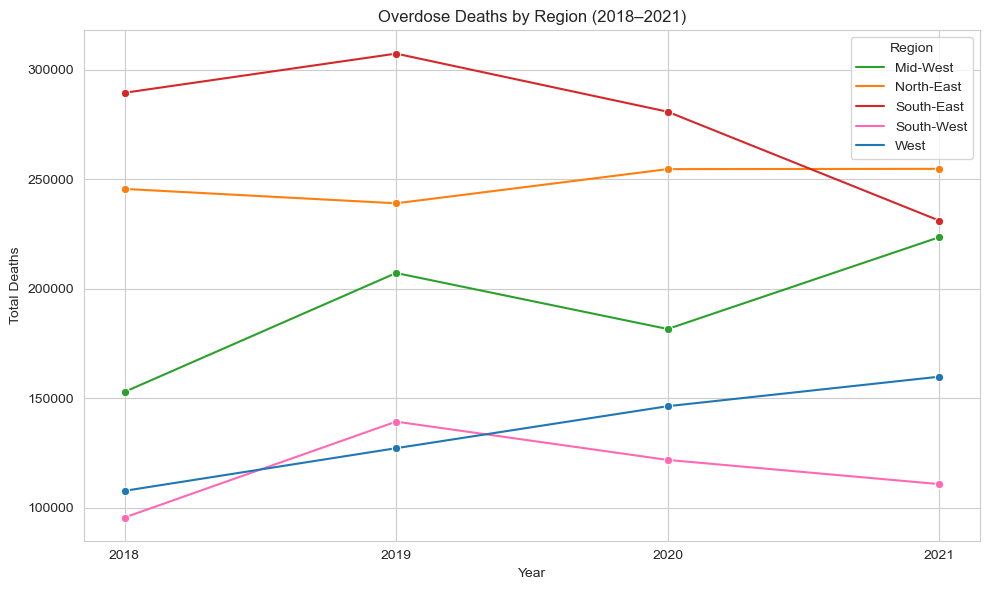

In [31]:
REGION_COLORS = {
    "West": "#1f77b4",
    "Mid-West": "#2ca02c",
    "South-West": "#ff69b4",
    "South-East": "#d62728",
    "North-East": "#ff7f0e",
    None: "#999999"
}

plot_df = region_totals.copy()
plot_df["Year"] = plot_df["Year"].astype(int)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=plot_df.sort_values(["Region","Year"]),
    x="Year", y="Total Actual Deaths", hue="Region",
    palette=REGION_COLORS, marker="o"
)
plt.title("Overdose Deaths by Region (2018–2021)")
plt.ylabel("Total Deaths")
plt.xlabel("Year")
plt.xticks([2018,2019,2020,2021])
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


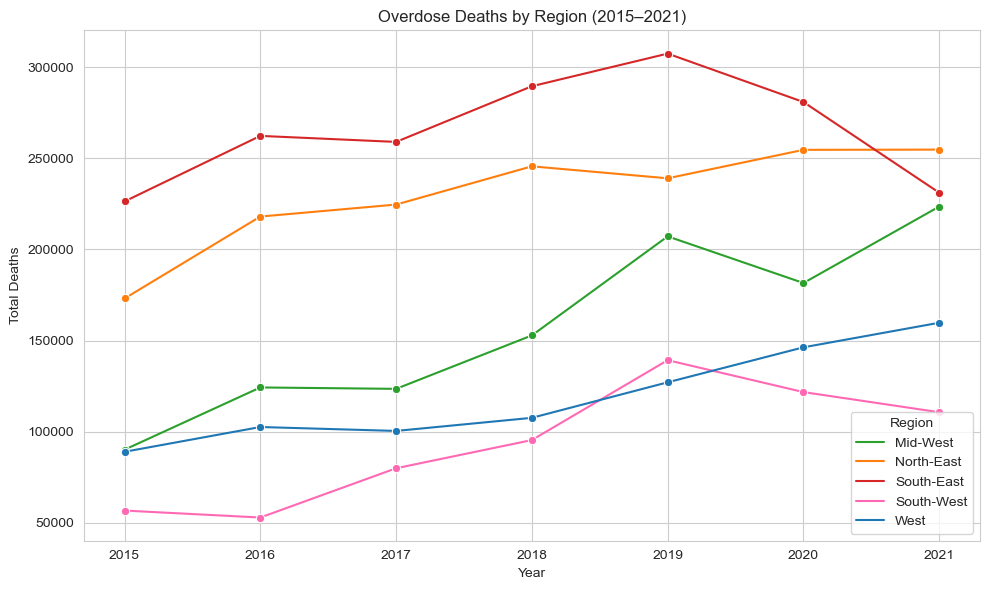

In [32]:
REGION_COLORS = {
    "West": "#1f77b4",
    "Mid-West": "#2ca02c",
    "South-West": "#ff69b4",
    "South-East": "#d62728",
    "North-East": "#ff7f0e",
    None: "#999999"
}

# 2) Filter and aggregate 2015–2017
df["Year"] = df["Year"].astype(int)
df_1517 = df[df["Year"].between(2015, 2021, inclusive="both")]

region_totals = (
    df_1517.groupby(["Year", "Region"], dropna=False)["Total Actual Deaths"]
           .sum()
           .reset_index()
)

# 3) Make Year a string for seaborn hue to avoid legend label issues
region_totals["Year"] = region_totals["Year"].astype(str)

plot_df = region_totals.copy()
plot_df["Year"] = plot_df["Year"].astype(int)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=plot_df.sort_values(["Region", "Year"]),
    x="Year", y="Total Actual Deaths", hue="Region",
    palette=REGION_COLORS, marker="o"
)

plt.title("Overdose Deaths by Region (2015–2021)")
plt.ylabel("Total Deaths")
plt.xlabel("Year")
plt.xticks(range(2015, 2022))  # Adjust ticks to include all years
plt.tight_layout()
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

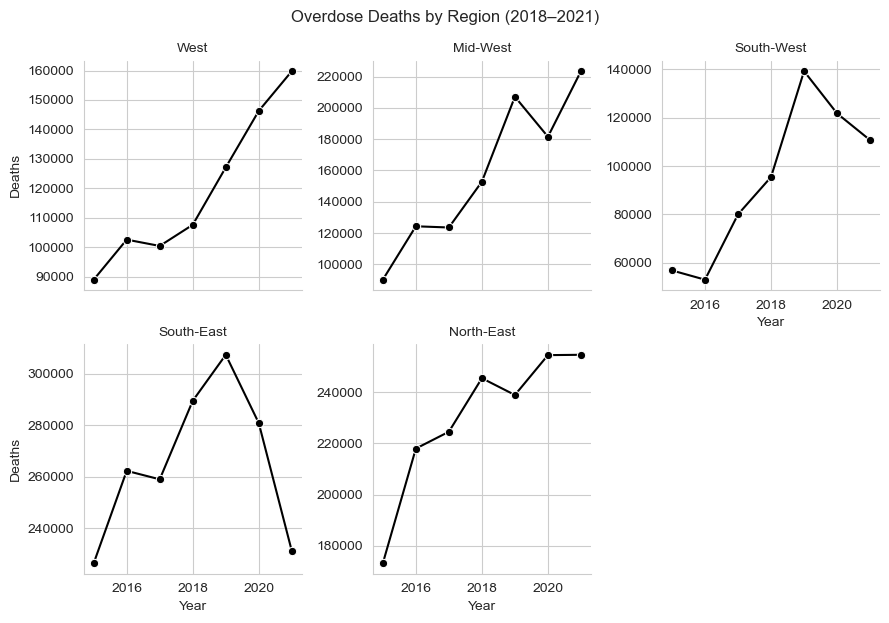

In [33]:
g = sns.FacetGrid(
    plot_df, col="Region", col_wrap=3, sharey=False, height=3,
    col_order=["West","Mid-West","South-West","South-East","North-East"]
)
g.map_dataframe(sns.lineplot, x="Year", y="Total Actual Deaths", marker="o",
                color="black")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Deaths")
g.fig.suptitle("Overdose Deaths by Region (2018–2021)", y=1.03)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


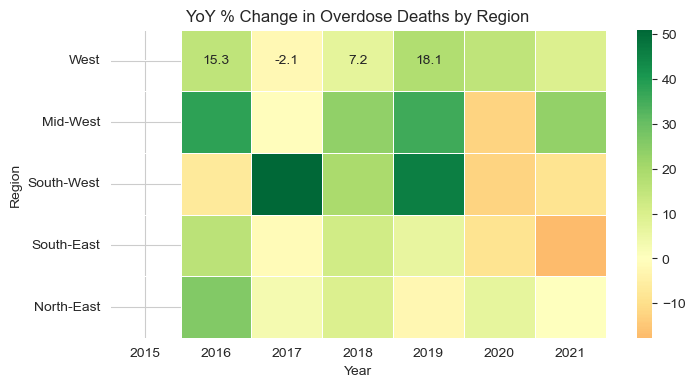

In [34]:
# Compute YoY % change by region
wide = plot_df.pivot(index="Region", columns="Year", values="Total Actual Deaths")
yoy = wide.pct_change(axis=1) * 100  # % change vs prior year (NaN for 2018)

plt.figure(figsize=(8,4))
sns.heatmap(yoy.loc[["West","Mid-West","South-West","South-East","North-East"]],
            annot=True, fmt=".1f", cmap="RdYlGn", center=0, linewidths=.5)
plt.title("YoY % Change in Overdose Deaths by Region")
plt.xlabel("Year")
plt.ylabel("Region")
plt.show()


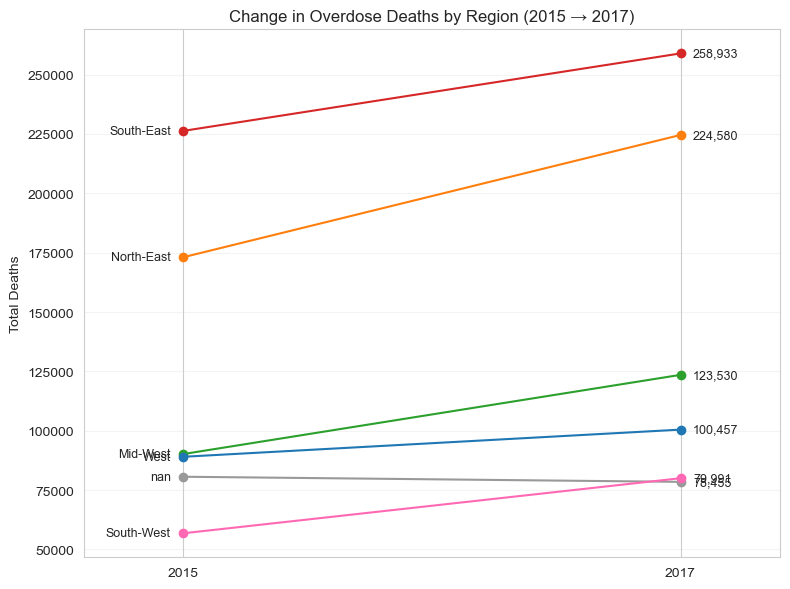

    Region    2015    2017 Abs Change (2017-2015) % Change
North-East 173,073 224,580                 51,507    29.8%
  Mid-West  90,164 123,530                 33,366    37.0%
South-East 226,288 258,933                 32,645    14.4%
South-West  56,791  79,991                 23,200    40.9%
      West  89,015 100,457                 11,442    12.9%
       NaN  80,609  78,455                 -2,154    -2.7%


In [35]:
endpoints = plot_df[plot_df["Year"].isin([2015, 2017])]
pivot = endpoints.pivot(index="Region", columns="Year", values="Total Actual Deaths").reset_index()

plt.figure(figsize=(8,6))
for _, r in pivot.iterrows():
    c = REGION_COLORS.get(r["Region"], "#999999")
    plt.plot([2015, 2017], [r[2015], r[2017]], marker="o", color=c)
    plt.text(2015-0.05, r[2015], r["Region"], ha="right", va="center", fontsize=9)
    plt.text(2017+0.05, r[2017], f'{int(r[2017]):,}', ha="left", va="center", fontsize=9)

plt.xlim(2014.6, 2017.4)
plt.xticks([2015, 2017])
plt.title("Change in Overdose Deaths by Region (2015 → 2017)")
plt.ylabel("Total Deaths")
plt.xlabel("")
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()

# Build summary table
summary = pivot.rename(columns={2015: "2015", 2017: "2017"}).copy()
summary["Abs Change (2017-2015)"] = summary["2017"] - summary["2015"]
summary["% Change"] = np.where(
    summary["2015"] == 0,
    np.nan,  # Avoid divide-by-zero
    (summary["Abs Change (2017-2015)"] / summary["2015"]) * 100
)

# Sort by absolute change first, then % change
summary = summary.sort_values(
    by=["Abs Change (2017-2015)", "% Change"], 
    ascending=[False, False]
)

# Format numbers
summary_formatted = summary.copy()
for col in ["2015", "2017", "Abs Change (2017-2015)"]:
    summary_formatted[col] = summary_formatted[col].map(lambda x: f"{int(x):,}")
summary_formatted["% Change"] = summary_formatted["% Change"].map(
    lambda x: f"{x:.1f}%" if pd.notnull(x) else "n/a"
)

# Display clean table
try:
    display(summary_formatted.style.hide_index())
except:
    print(summary_formatted.to_string(index=False))

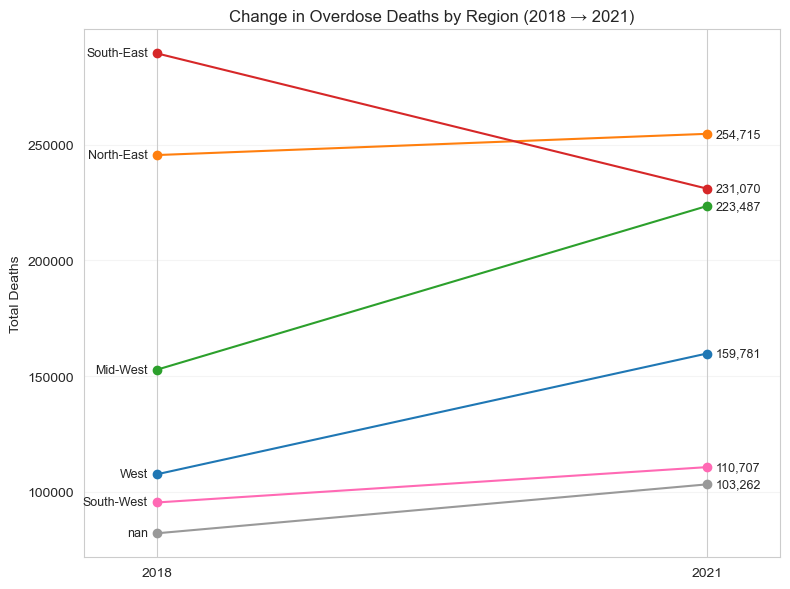

    Region    2018    2021 Abs Change (2021-2018) % Change
  Mid-West 152,831 223,487                 70,656    46.2%
      West 107,641 159,781                 52,140    48.4%
       NaN  82,133 103,262                 21,129    25.7%
South-West  95,448 110,707                 15,259    16.0%
North-East 245,547 254,715                  9,168     3.7%
South-East 289,464 231,070                -58,394   -20.2%


In [36]:
endpoints = plot_df[plot_df["Year"].isin([2018, 2021])]
pivot = endpoints.pivot(index="Region", columns="Year", values="Total Actual Deaths").reset_index()

plt.figure(figsize=(8,6))
for _, r in pivot.iterrows():
    c = REGION_COLORS.get(r["Region"], "#999999")
    plt.plot([2018, 2021], [r[2018], r[2021]], marker="o", color=c)
    plt.text(2018-0.05, r[2018], r["Region"], ha="right", va="center", fontsize=9)
    plt.text(2021+0.05, r[2021], f'{int(r[2021]):,}', ha="left", va="center", fontsize=9)

plt.xlim(2017.6, 2021.4)
plt.xticks([2018, 2021])
plt.title("Change in Overdose Deaths by Region (2018 → 2021)")
plt.ylabel("Total Deaths")
plt.xlabel("")
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()

# Filter for 2018 and 2021
endpoints = plot_df[plot_df["Year"].isin([2018, 2021])]
pivot_18_21 = endpoints.pivot(index="Region", columns="Year", values="Total Actual Deaths").reset_index()

# Rename columns
summary_18_21 = pivot_18_21.rename(columns={2018: "2018", 2021: "2021"}).copy()

# Calculate absolute and percentage change
summary_18_21["Abs Change (2021-2018)"] = summary_18_21["2021"] - summary_18_21["2018"]
summary_18_21["% Change"] = np.where(
    summary_18_21["2018"] == 0,
    np.nan,  # Avoid divide-by-zero
    (summary_18_21["Abs Change (2021-2018)"] / summary_18_21["2018"]) * 100
)

# Sort by Abs Change first, then % Change
summary_18_21 = summary_18_21.sort_values(
    by=["Abs Change (2021-2018)", "% Change"], 
    ascending=[False, False]
)

# Format numbers (fixed column name here)
summary_18_21_fmt = summary_18_21.copy()
for col in ["2018", "2021", "Abs Change (2021-2018)"]:
    summary_18_21_fmt[col] = summary_18_21_fmt[col].map(lambda x: f"{int(x):,}")
summary_18_21_fmt["% Change"] = summary_18_21_fmt["% Change"].map(
    lambda x: f"{x:.1f}%" if pd.notnull(x) else "n/a"
)

# Display clean table
try:
    display(summary_18_21_fmt.style.hide_index())
except:
    print(summary_18_21_fmt.to_string(index=False))



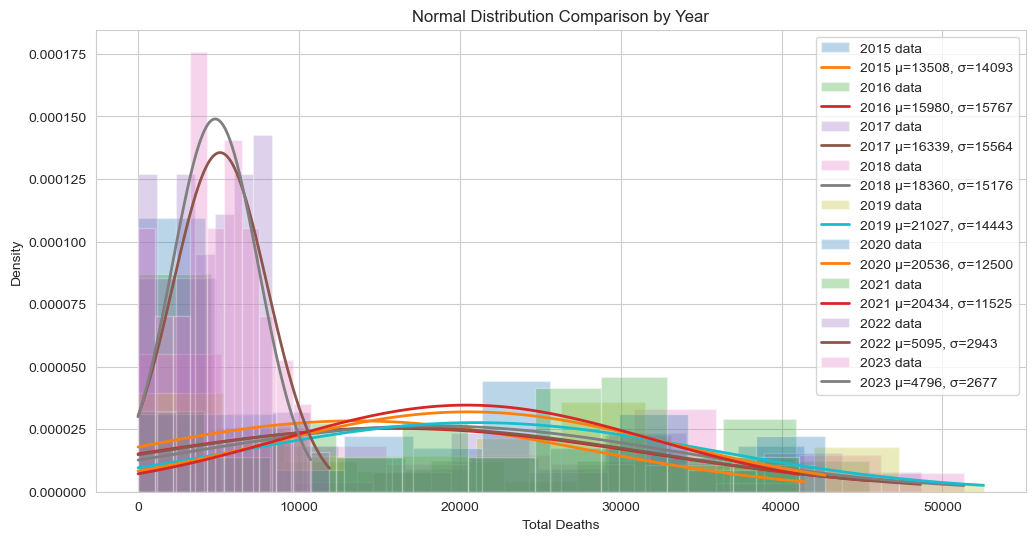

In [37]:

years = df["Year"].unique()

plt.figure(figsize=(12, 6))

for year in years:
    data = df[df["Year"] == year]["Total Actual Deaths"]
    
    # Fit normal distribution
    mu, sigma = norm.fit(data)
    
    # Plot histogram
    count, bins, _ = plt.hist(data, bins=10, density=True, alpha=0.3, label=f"{year} data")
    
    # Plot PDF curve
    x = np.linspace(min(data), max(data), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), linewidth=2, label=f"{year} μ={mu:.0f}, σ={sigma:.0f}")

plt.title("Normal Distribution Comparison by Year")
plt.xlabel("Total Deaths")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

## Visualisation - Total Deaths per State based on the year

In [38]:
# --- REGION MAPS ---
STATE_TO_REGION = {
    # West
    "Washington":"West","Oregon":"West","California":"West","Nevada":"West","Idaho":"West","Montana":"West",
    "Wyoming":"West","Alaska":"West","Hawaii":"West",
    # Mid-West
    "North Dakota":"Mid-West","South Dakota":"Mid-West","Nebraska":"Mid-West","Kansas":"Mid-West",
    "Minnesota":"Mid-West","Iowa":"Mid-West","Missouri":"Mid-West","Wisconsin":"Mid-West",
    "Illinois":"Mid-West","Indiana":"Mid-West","Michigan":"Mid-West","Ohio":"Mid-West",
    # South-West
    "Arizona":"South-West","New Mexico":"South-West","Texas":"South-West","Oklahoma":"South-West",
    # South-East
    "Arkansas":"South-East","Louisiana":"South-East","Mississippi":"South-East","Alabama":"South-East",
    "Georgia":"South-East","Florida":"South-East","South Carolina":"South-East","North Carolina":"South-East",
    "Tennessee":"South-East","Kentucky":"South-East","Virginia":"South-East","West Virginia":"South-East",
    # North-East
    "Maine":"North-East","New Hampshire":"North-East","Vermont":"North-East","Massachusetts":"North-East",
    "Rhode Island":"North-East","Connecticut":"North-East","New York":"North-East","New Jersey":"North-East",
    "Pennsylvania":"North-East","Delaware":"North-East","Maryland":"North-East","District of Columbia":"North-East"
}


REGION_COLORS = {
    "West": "#1f77b4",       # Blue
    "Mid-West": "#2ca02c",   # Green
    "South-West": "#ff69b4", # Pink (approx. match)
    "South-East": "#d62728", # Red
    "North-East": "#ff7f0e", # Orange
    None: "#999999"          # Default gray
}

# ===== helpers =====
def create_map_for_year(year):
    """Build a Folium map for a given year with hover tooltip + region-colored borders."""
    data_for_year = agg[agg["Year"] == year]
    death_lookup = dict(zip(data_for_year["State Name"], data_for_year["Total Actual Deaths"]))
    region_lookup = {s: STATE_TO_REGION.get(s) for s in data_for_year["State Name"].unique()}

    m = folium.Map(location=[37.8, -96], zoom_start=4, tiles="cartodbpositron")

    choropleth = folium.Choropleth(
        geo_data=state_geo,
        data=data_for_year,
        columns=["State Name", "Total Actual Deaths"],
        key_on="feature.properties.name",
        fill_color="RdYlGn_r",
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f"Total Drug Overdose Deaths ({year})",
        highlight=True
    ).add_to(m)

    # Inject per-state fields for tooltip
    for feature in choropleth.geojson.data["features"]:
        state = feature["properties"]["name"]
        feature["properties"]["name_flag"] = state
        feature["properties"]["region"] = region_lookup.get(state)
        feature["properties"]["total_deaths"] = int(death_lookup.get(state, 0))

    # ✅ FIXED: add the missing comma between "region" and "total_deaths"
    folium.features.GeoJsonTooltip(
        fields=["name_flag", "region", "total_deaths"],
        aliases=["State:", "Region (border color):", "Total Deaths:"],
        localize=True,
        sticky=True
    ).add_to(choropleth.geojson)

    # Region-colored borders (no fill on this overlay)
    folium.GeoJson(
        state_geo,
        name="Region Borders",
        style_function=lambda f: {
            "fillOpacity": 0,
            "color": REGION_COLORS.get(region_lookup.get(f["properties"]["name"]), "#999999"),
            "weight": 2.5
        }
    ).add_to(m)

    # Legend on the right
    legend_html = """
    <div style="
        position: fixed; top: 50px; right: 20px; z-index: 9999;
        background: white; border: 1px solid #bbb; padding: 10px 12px;
        border-radius: 6px; font-size: 13px; box-shadow: 0 1px 6px rgba(0,0,0,0.15);
    ">
      <b>Border Color = Region</b><br>
      <div style="margin-top:6px;">
        <span style="border:2.5px solid #1f77b4;display:inline-block;width:16px;height:0;
                     margin-right:6px;vertical-align:middle;"></span>Northeast<br>
        <span style="border:2.5px solid #2ca02c;display:inline-block;width:16px;height:0;
                     margin-right:6px;vertical-align:middle;"></span>Midwest<br>
        <span style="border:2.5px solid #ff7f0e;display:inline-block;width:16px;height:0;
                     margin-right:6px;vertical-align:middle;"></span>South<br>
        <span style="border:2.5px solid #9467bd;display:inline-block;width:16px;height:0;
                     margin-right:6px;vertical-align:middle;"></span>West
      </div>
    </div>
    """
    m.get_root().html.add_child(folium.Element(legend_html))

    return m

def top5_text_for_year(year):
    top5 = (
        agg[agg["Year"] == year]
        .sort_values("Total Actual Deaths", ascending=False)
        .head(5)
        .reset_index(drop=True)
    )
    lines = [f"Top 5 States for {year} (Total Deaths)"]
    for i, row in top5.iterrows():
        lines.append(f"{i+1}) {row['State Name']} {row['Total Actual Deaths']:,} deaths")
    return "\n".join(lines)

# ===== widgets =====
years = sorted(int(y) for y in agg["Year"].dropna().unique())
slider = widgets.IntSlider(
    value=years[0], min=years[0], max=years[-1], step=1,
    description="Year", continuous_update=False, readout=True
)
play = widgets.Play(interval=700, value=years[0], min=years[0], max=years[-1], step=1)
widgets.jslink((play, 'value'), (slider, 'value'))  # link Play to the slider

out = widgets.Output()

def render(year):
    with out:
        clear_output(wait=True)
        m = create_map_for_year(year)
        display(m)
        print()  # spacer
        print(top5_text_for_year(year))

# initial render
render(slider.value)

def on_year_change(change):
    if change['name'] == 'value':
        render(change['new'])

slider.observe(on_year_change)

ui = widgets.HBox([play, slider])
display(ui, out)

Output()

In [39]:
# Group by Year and sum all deaths
df_yearly_deaths = df_drug.groupby("Year", as_index=False)["Actual Deaths"].sum()

# Rename column for clarity
df_yearly_deaths.rename(columns={"Actual Deaths": "Total Deaths"}, inplace=True)

# Show result
print(df_yearly_deaths)

   Year  Total Deaths
0  2015        715940
1  2016        846951
2  2017        865946
3  2018        973064
4  2019       1114441
5  2020       1088428
6  2021       1083022
7  2022        270056
8  2023        254190


## Visualisation Queries and Insights
To find out any business queries or insights that are useful to analyse.

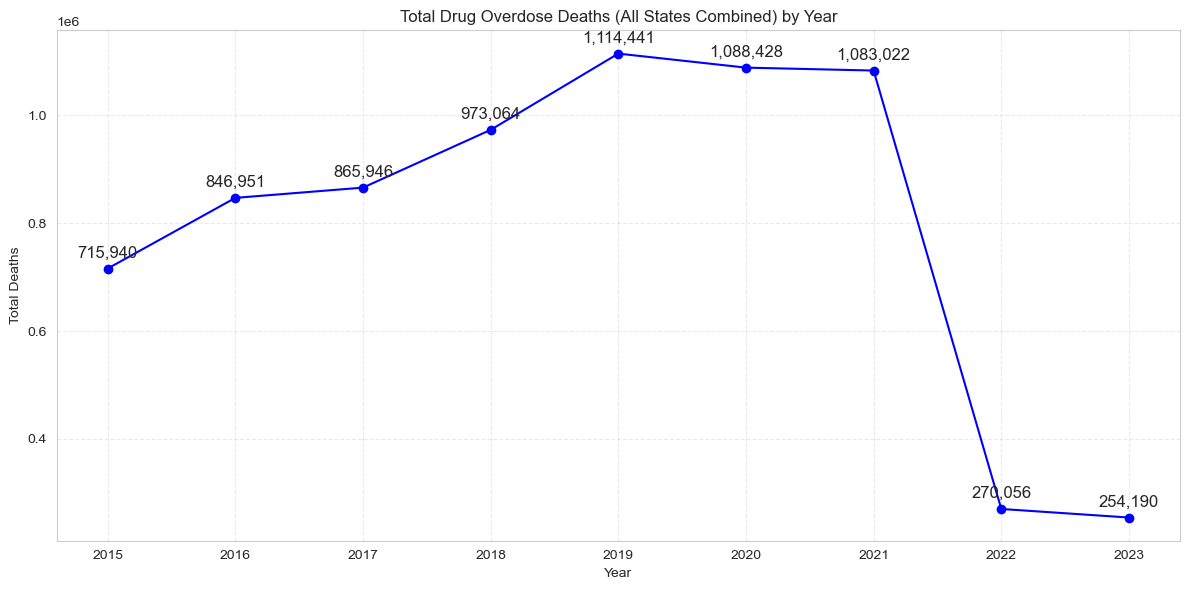

In [40]:
# Sum across all states for each year
total_by_year = (
    agg.groupby("Year", as_index=False)["Total Actual Deaths"]
       .sum()
       .rename(columns={"Total Actual Deaths": "National Total Deaths"})
).sort_values("Year")

plt.figure(figsize=(12, 6))
plt.plot(total_by_year["Year"], total_by_year["National Total Deaths"], marker='o', color='blue')
plt.title("Total Drug Overdose Deaths (All States Combined) by Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.grid(True, linestyle="--", alpha=0.4)

# Annotate each point with its value
for x, y in zip(total_by_year["Year"], total_by_year["National Total Deaths"]):
    plt.annotate(
        f"{y:,}",  # formatted with commas
        (x, y),
        textcoords="offset points",
        xytext=(0, 8),
        ha='center',
        fontsize=12
    )

# Optional: annotate peak year with an arrow
peak_row = total_by_year.iloc[total_by_year["National Total Deaths"].idxmax()]


plt.tight_layout()
plt.show()


In [41]:
# --- Define a consistent color palette ---
palette = plt.get_cmap("tab10")  # or "Set2", "tab20", etc.
color_map = {}  # will fill dynamically as drugs appear

def outlier_stats(series: pd.Series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    skewness = series.skew()
    return q1, q3, upper, skewness

def top5_for_year(df, year):
    df_y = df[df["Year"] == year].copy()
    if df_y.empty:
        return pd.DataFrame(), []
    top5 = (
        df_y.groupby("Indicator")["Actual Deaths"]
        .sum()
        .sort_values(ascending=False)
        .head(5)
        .index.tolist()
    )
    return df_y[df_y["Indicator"].isin(top5)].copy(), top5

def plot_box_for_year(year):
    global color_map
    df_y_top5, labels = top5_for_year(df_drug, year)
    plt.close("all")

    if df_y_top5.empty:
        print(f"No data found for year {year}.")
        return

    # Assign colors consistently
    for i, drug in enumerate(labels):
        if drug not in color_map:
            color_map[drug] = palette(i % 10)

    # Prepare data and stats
    data = []
    stats_rows = []
    for drug in labels:
        vals = df_y_top5.loc[df_y_top5["Indicator"] == drug, "Actual Deaths"].astype(float)
        data.append(vals.values)
        q1, q3, upper, skewness = outlier_stats(vals)
        stats_rows.append([drug, q1, q3, upper, skewness])

    outlier_df = pd.DataFrame(stats_rows, columns=["Drug", "Q1", "Q3", "Upper Bound", "Skewness"])

    # Plot boxplot
    fig, ax = plt.subplots(figsize=(10, 6))
    bp = ax.boxplot(
        data,
        vert=False,
        labels=labels,
        patch_artist=True,
        showfliers=True,
        whis=1.5
    )

    # Apply colors
    for patch, drug in zip(bp['boxes'], labels):
        patch.set_facecolor(color_map[drug])
        patch.set_alpha(0.6)
    for whisker in bp['whiskers']:
        whisker.set_color("gray")
    for cap in bp['caps']:
        cap.set_color("gray")
    for median in bp['medians']:
        median.set_color("black")

    # Upper bound lines
    for i, row in enumerate(outlier_df.itertuples(index=False), start=1):
        ax.vlines(x=row[3], ymin=i-0.4, ymax=i+0.4, linestyles="dashed", colors="red")

    ax.set_title(f"Top 5 Drugs by Deaths in {year} (Boxplots + Upper Outlier Threshold)")
    ax.set_xlabel("Number of Deaths")
    ax.set_ylabel("Drug")
    ax.grid(True, axis="x", alpha=0.2)
    plt.tight_layout()
    plt.show()

    # Display stats table
    display(outlier_df.round(2))

# ---- Interactive widget ----
years = sorted(df_drug["Year"].dropna().unique().tolist())
interact(plot_box_for_year, year=Dropdown(options=years, value=years[0], description="Year"));


NameError: name 'interact' is not defined

Identify all states that the top 5 drugs are outliers

📊 States with Outlier Death Counts for Each Drug:
                 Drug State  Actual Deaths
2021  Cocaine (T40.5)    YC            996
2415   Heroin (T40.1)    CA            993
1779  Cocaine (T40.5)    MA            991
1761  Cocaine (T40.5)    MA            988
2292   Heroin (T40.1)    IL            988
...               ...   ...            ...
2490   Heroin (T40.1)    TX            747
2501   Heroin (T40.1)    TX            739
2566   Heroin (T40.1)    TX            734
2381   Heroin (T40.1)    NJ            655
2680   Heroin (T40.1)    FL            644

[84 rows x 3 columns]


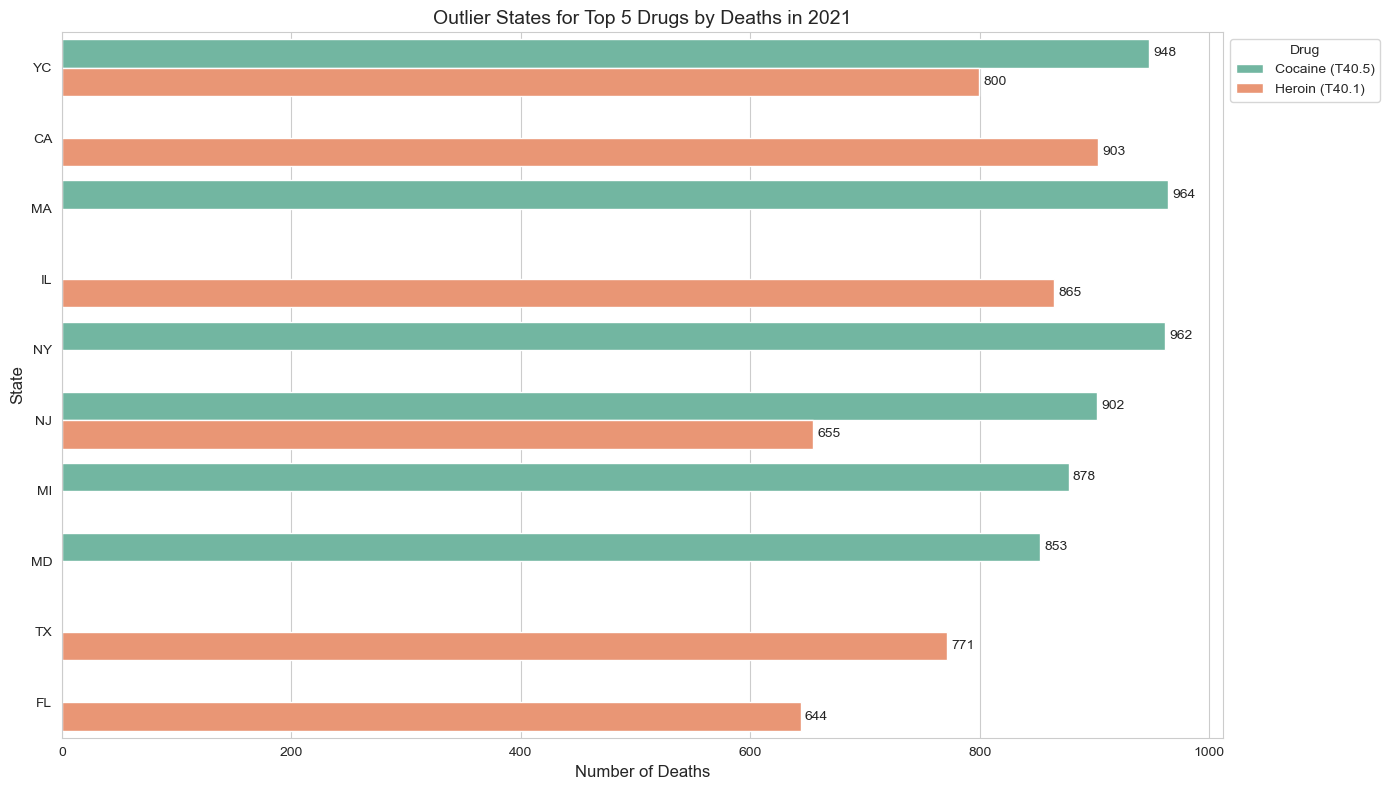

In [ ]:
# Merge outlier thresholds into the main DataFrame
df_merged = df_top5.merge(outlier_df[["Drug", "Upper Bound"]], left_on="Indicator", right_on="Drug")

# Find outliers (Actual Deaths > Upper Bound)
outlier_states_df = df_merged[df_merged["Actual Deaths"] > df_merged["Upper Bound"]]

# Select relevant columns
outlier_states_df = outlier_states_df[["Indicator", "State", "Actual Deaths"]].rename(columns={"Indicator": "Drug"})

# Sort by deaths for clarity
outlier_states_df = outlier_states_df.sort_values(by="Actual Deaths", ascending=False)

print("📊 States with Outlier Death Counts for Each Drug:")
print(outlier_states_df)


# Ensure we already have outlier_states_df
# Columns: ["Drug", "State", "Actual Deaths"]

# Plot bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=outlier_states_df,
    y="State",              
    x="Actual Deaths",       
    hue="Drug",              
    palette="Set2",
    dodge=True,
    errorbar=None
)

# Add annotations (numbers at the end of each bar)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.title("Outlier States for Top 5 Drugs by Deaths in 2021", fontsize=14)
plt.xlabel("Number of Deaths", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.legend(title="Drug", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

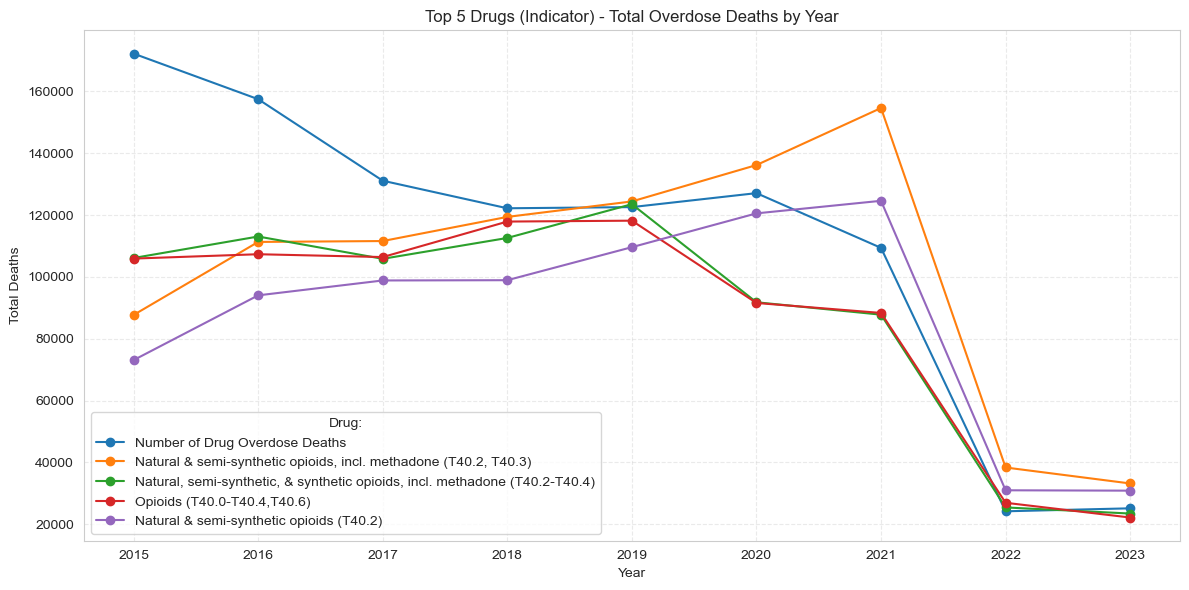

In [ ]:
top5_drugs = (
    df_drug.groupby("Indicator")["Actual Deaths"]
           .sum()
           .sort_values(ascending=False)
           .head(5)
           .index
)

# 2) Filter dataset for only top 5 drugs
top5_data = df_drug[df_drug["Indicator"].isin(top5_drugs)]

# 3) Aggregate deaths per year per drug
drug_by_year = (
    top5_data.groupby(["Year", "Indicator"], as_index=False)["Actual Deaths"]
             .sum()
)

# 4) Plot multi-line chart
plt.figure(figsize=(12, 6))
for drug in top5_drugs:
    subset = drug_by_year[drug_by_year["Indicator"] == drug]
    plt.plot(subset["Year"], subset["Actual Deaths"], marker='o', label=drug)

plt.title("Top 5 Drugs (Indicator) - Total Overdose Deaths by Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.legend(title="Drug:")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

Problem of the 2022 is that it not a full 2022 ending from 2021 to 2022 so there is incomplete months to showcase this data accuracy. Resulting in dropping N/A values

In [ ]:
# Create a clean summary table (pivot) of top 5 drugs by year
df_top5_summary = (
    drug_by_year
    .pivot(index="Year", columns="Indicator", values="Actual Deaths")
    .reindex(columns=top5_drugs)  # ensure columns are in top5_drugs order
    .sort_index()
    .fillna(0)
    .astype(int)
)

# Display the table
print("📊 Top 5 Drugs Overdose Deaths by Year")
display(df_top5_summary)

📊 Top 5 Drugs Overdose Deaths by Year


Indicator,Number of Drug Overdose Deaths,"Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)","Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)","Opioids (T40.0-T40.4,T40.6)",Natural & semi-synthetic opioids (T40.2)
Year,,,,,
2015,172202,87688,106103,105913,73087
2016,157461,111299,113052,107324,94024
2017,131097,111586,105837,106407,98838
2018,122185,119394,112585,117886,98925
2019,122561,124398,123505,118174,109605
2020,127081,136159,91791,91561,120537
2021,109377,154604,87775,88334,124600
2022,24190,38355,25438,26945,30984
2023,25152,33191,23462,22175,30864


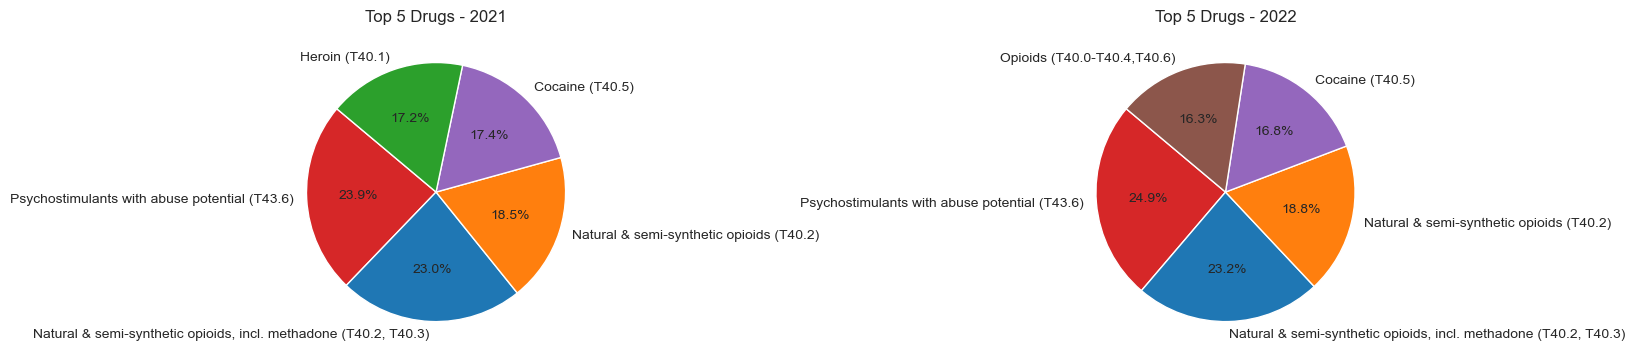


🔍 Comparison of Top Drugs by Year


Year,2021,2022
Indicator,,
Cocaine (T40.5),117183,27681
Heroin (T40.1),115583,23857
Natural & semi-synthetic opioids (T40.2),124600,30984
"Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)",154604,38355
"Opioids (T40.0-T40.4,T40.6)",88334,26945
Psychostimulants with abuse potential (T43.6),160995,41044


In [ ]:
# --- Filter data for 2021 & 2022 ---
df_filtered = df_drug[df_drug["Year"].isin([2021, 2022])]

# --- Group by Indicator for each year ---
yearly_data = (
    df_filtered.groupby(["Year", "Indicator"], as_index=False)["Actual Deaths"]
              .sum()
)

# --- Get Top 5 per year ---
data_2021 = yearly_data[yearly_data["Year"] == 2021].nlargest(5, "Actual Deaths")
data_2022 = yearly_data[yearly_data["Year"] == 2022].nlargest(5, "Actual Deaths")

# Combine all drugs in top 5 (union) for consistent colors
all_drugs = list(set(data_2021["Indicator"]).union(set(data_2022["Indicator"])))

# Assign distinct colors (Matplotlib tab colors for clarity)
colors_map = {drug: plt.cm.tab10(i % 10) for i, drug in enumerate(all_drugs)}

# --- Pie chart setup ---
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# --- 2021 Pie ---
axes[0].pie(
    data_2021["Actual Deaths"], 
    labels=data_2021["Indicator"], 
    autopct="%1.1f%%", 
    startangle=140,
    colors=[colors_map[d] for d in data_2021["Indicator"]],
    wedgeprops={"edgecolor": "white", "linewidth": 1}
)
axes[0].set_title("Top 5 Drugs - 2021")

# --- 2022 Pie ---
axes[1].pie(
    data_2022["Actual Deaths"], 
    labels=data_2022["Indicator"], 
    autopct="%1.1f%%", 
    startangle=140,
    colors=[colors_map[d] for d in data_2022["Indicator"]],
    wedgeprops={"edgecolor": "white", "linewidth": 1}
)
axes[1].set_title("Top 5 Drugs - 2022")

plt.tight_layout()
plt.show()

# --- Outline numbers in table form ---
print("\n🔍 Comparison of Top Drugs by Year")
comparison = yearly_data[yearly_data["Year"].isin([2021, 2022])]
comparison = comparison[comparison["Indicator"].isin(all_drugs)]
comparison = comparison.pivot(index="Indicator", columns="Year", values="Actual Deaths").fillna(0).astype(int)
display(comparison)


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


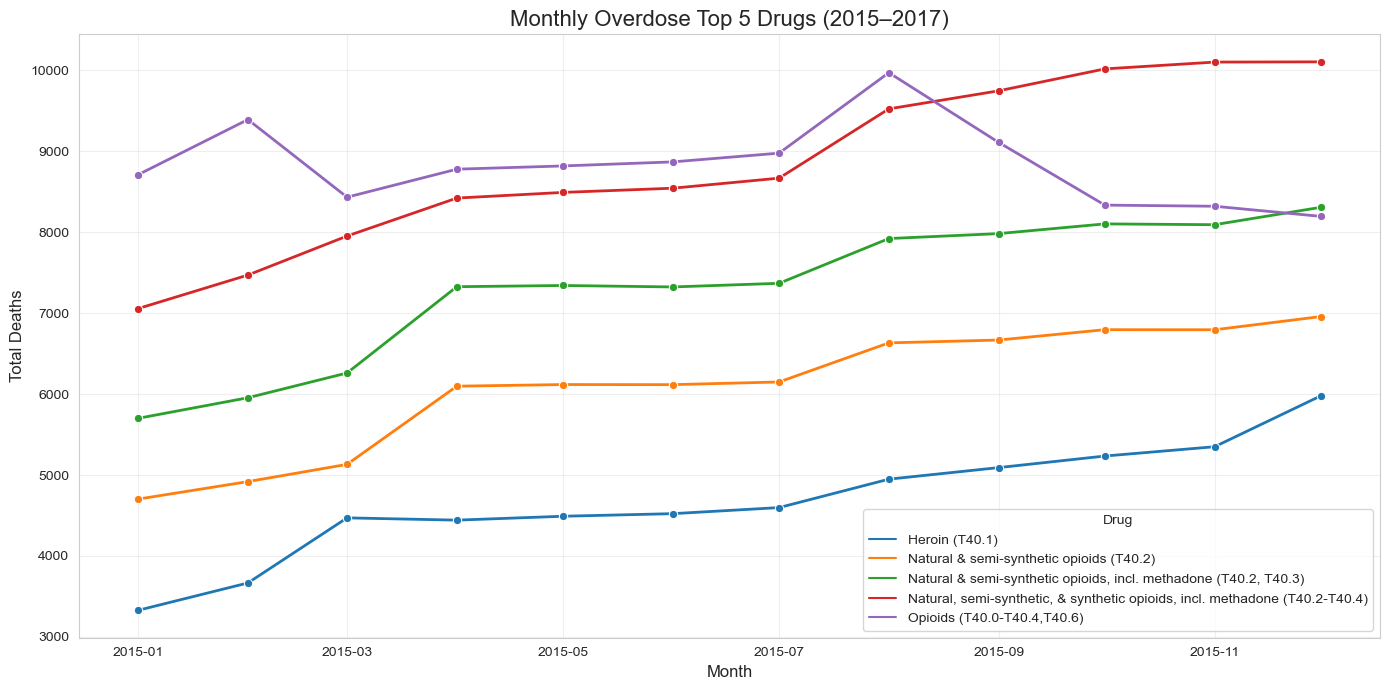

In [ ]:
# Filter for 2015–2017
df_15_17 = df_drug[df_drug["Year"].isin([2015])].copy()

# Get top 6 drugs based on total deaths
top6_drugs = (
    df_15_17.groupby("Indicator")["Actual Deaths"]
    .sum()
    .sort_values(ascending=False)
    .head(6)
    .index
)

# Drop the top 1 drug, keep ranks 2–6
top5_skip1 = top6_drugs[1:]

# Filter only these drugs
df_top5_skip1 = df_15_17[df_15_17["Indicator"].isin(top5_skip1)].copy()

# Create datetime for month-year
df_top5_skip1["Date"] = pd.to_datetime(
    df_top5_skip1["Year"].astype(str) + "-" + df_top5_skip1["Month"].astype(str) + "-01"
)

# Aggregate by Date & Drug
monthly_drug_totals = (
    df_top5_skip1.groupby(["Date", "Indicator"])["Actual Deaths"]
    .sum()
    .reset_index()
)

# Plot line chart
plt.figure(figsize=(14,7))
sns.lineplot(
    data=monthly_drug_totals, 
    x="Date", y="Actual Deaths", hue="Indicator", 
    marker="o", linewidth=2
)

plt.title(f"Monthly Overdose Top {len(top5_skip1)} Drugs (2015–2017)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Deaths", fontsize=12)
plt.legend(title="Drug")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


NameError: name 'mpatches' is not defined

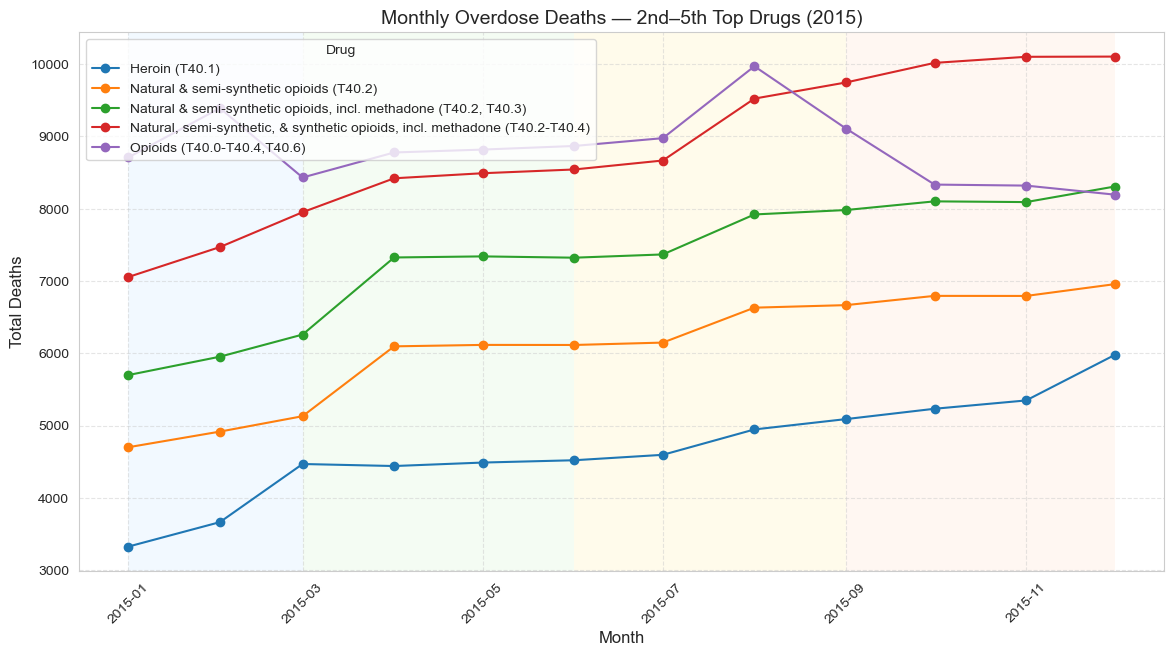

In [ ]:
# ===== 1) Filter to 2015 and pick drugs ranked 2nd–5th =====
df_2015 = df_drug[df_drug["Year"] == 2015].copy()

top5_drugs_2015 = (
    df_2015.groupby("Indicator")["Actual Deaths"]
    .sum()
    .sort_values(ascending=False)
    .head(6)
    .index
)
# Skip #1, keep #2–#5
top4_2015 = top5_drugs_2015[1:]

df_top4_2015 = df_2015[df_2015["Indicator"].isin(top4_2015)].copy()

# ===== 2) Build Year-Month =====
# If Month is a string like "January", this will work; otherwise it falls back to numeric
try:
    df_top4_2015["MonthNum"] = pd.to_datetime(df_top4_2015["Month"], format="%B").dt.month
except Exception:
    df_top4_2015["MonthNum"] = pd.to_numeric(df_top4_2015["Month"], errors="coerce")

df_top4_2015["Year-Month"] = pd.to_datetime(
    df_top4_2015["Year"].astype(str) + "-" + df_top4_2015["MonthNum"].astype(int).astype(str) + "-01"
)

# ===== 3) Aggregate and pivot (ensure full Jan–Dec range) =====
monthly_2015 = (
    df_top4_2015.groupby(["Year-Month", "Indicator"])["Actual Deaths"]
    .sum()
    .reset_index()
    .sort_values("Year-Month")
)

pivot_2015_top4 = (
    monthly_2015.pivot(index="Year-Month", columns="Indicator", values="Actual Deaths")
    .reindex(pd.date_range("2015-01-01", "2015-12-01", freq="MS"))
    .fillna(0)
)

# ===== 4) Plot with seasonal shading =====
plt.figure(figsize=(14, 7))
ax = plt.gca()

xmin = pivot_2015_top4.index.min()
xmax = pivot_2015_top4.index.max()

def clamp(dt):
    return max(xmin, min(xmax, dt))

# USA meteorological seasons
season_specs = [
    ("Winter",  "#cfe8ff", lambda y: (pd.Timestamp(year=y-1, month=12, day=1), pd.Timestamp(year=y, month=3, day=1))),
    ("Spring",  "#d7f7d0", lambda y: (pd.Timestamp(year=y,   month=3,  day=1), pd.Timestamp(year=y, month=6, day=1))),
    ("Summer",  "#fff3b0", lambda y: (pd.Timestamp(year=y,   month=6,  day=1), pd.Timestamp(year=y, month=9, day=1))),
    ("Autumn",  "#ffe0cc", lambda y: (pd.Timestamp(year=y,   month=9,  day=1), pd.Timestamp(year=y, month=12, day=1))),
]

# Draw bands that intersect 2015
for y in [2015, 2016]:  # include trailing winter (Dec 2015 -> Feb 2016)
    for name, color, span_fn in season_specs:
        start, end = span_fn(y)
        if end < xmin or start > xmax:
            continue
        ax.axvspan(clamp(start), clamp(end), color=color, alpha=0.25, linewidth=0, zorder=0)

# Plot lines (2nd–5th drugs)
for drug in pivot_2015_top4.columns:
    ax.plot(pivot_2015_top4.index, pivot_2015_top4[drug], marker="o", label=drug, zorder=2)

ax.set_title("Monthly Overdose Deaths — 2nd–5th Top Drugs (2015)", fontsize=14)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Total Deaths", fontsize=12)
ax.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)

# Legends: drugs + seasons
drug_legend = ax.legend(title="Drug", loc="upper left")
season_handles = [
    mpatches.Patch(color="#cfe8ff", alpha=0.25, label="Winter (Dec–Feb)"),
    mpatches.Patch(color="#d7f7d0", alpha=0.25, label="Spring (Mar–May)"),
    mpatches.Patch(color="#fff3b0", alpha=0.25, label="Summer (Jun–Aug)"),
    mpatches.Patch(color="#ffe0cc", alpha=0.25, label="Autumn (Sep–Nov)"),
]
season_legend = ax.legend(handles=season_handles, title="Seasons (USA)", loc="upper right")
ax.add_artist(drug_legend)

plt.tight_layout()
plt.show()


In [ ]:
!pip install mplcursors

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# %pip install ipywidgets mplcursors seaborn
sns.set_style("whitegrid")

# ---------- helpers ----------
def month_to_season(m: int) -> str:
    m = int(m)
    if m in (12, 1, 2):  return "Winter"
    if m in (3, 4, 5):   return "Spring"
    if m in (6, 7, 8):   return "Summer"
    return "Autumn"

def prep_year(df, year: int, top_k: int, skip_top_1: bool):
    """Return filtered df for chosen year with MonthNum, Year-Month, Season and selected drugs."""
    df_y = df[df["Year"] == year].copy()
    if df_y.empty:
        return df_y, []

    # Month -> numeric
    try:
        df_y["MonthNum"] = pd.to_datetime(df_y["Month"], format="%B").dt.month
    except Exception:
        df_y["MonthNum"] = pd.to_numeric(df_y["Month"], errors="coerce")
    df_y = df_y.dropna(subset=["MonthNum"]).copy()
    df_y["MonthNum"] = df_y["MonthNum"].astype(int)

    # Build Year-Month + Season
    df_y["Year-Month"] = pd.to_datetime(df_y["Year"].astype(str) + "-" + df_y["MonthNum"].astype(str) + "-01")
    df_y["Season"] = df_y["MonthNum"].map(month_to_season)

    # Top-K (optionally skip #1)
    ranked = (
        df_y.groupby("Indicator")["Actual Deaths"]
        .sum()
        .sort_values(ascending=False)
        .head(max(top_k, 1))
        .index.tolist()
    )
    if skip_top_1 and len(ranked) > 1:
        ranked = ranked[1:]

    df_y = df_y[df_y["Indicator"].isin(ranked)].copy()
    return df_y, ranked

def plot_season_bands(ax, year, xmin, xmax):
    def clamp(dt): return max(xmin, min(xmax, dt))
    season_specs = [
        ("Winter", "#cfe8ff", lambda y: (pd.Timestamp(year=y-1, month=12, day=1), pd.Timestamp(year=y, month=3, day=1))),
        ("Spring", "#d7f7d0", lambda y: (pd.Timestamp(year=y,   month=3,  day=1), pd.Timestamp(year=y, month=6, day=1))),
        ("Summer", "#fff3b0", lambda y: (pd.Timestamp(year=y,   month=6,  day=1), pd.Timestamp(year=y, month=9, day=1))),
        ("Autumn", "#ffe0cc", lambda y: (pd.Timestamp(year=y,   month=9,  day=1), pd.Timestamp(year=y, month=12, day=1))),
    ]
    for y in [year, year + 1]:  # catch trailing winter
        for _, color, span in season_specs:
            start, end = span(y)
            if end < xmin or start > xmax:
                continue
            ax.axvspan(clamp(start), clamp(end), color=color, alpha=0.25, linewidth=0, zorder=0)

# ---------- interactive ----------
def explore_overdoses(
    view="Line",
    year=2015,
    top_k=5,
    skip_top_1=True,
    show_season_bands=True,
    show_hover=True
):
    df_y, ranked = prep_year(df_drug, year, top_k, skip_top_1)
    if df_y.empty or not ranked:
        print("No data for the selected options.")
        return

    # Aggregations reused across views
    monthly = (
        df_y.groupby(["Year-Month", "Indicator"])["Actual Deaths"]
        .sum()
        .reset_index()
        .sort_values("Year-Month")
    )
    season_summary = (
        df_y.groupby(["Indicator", "Season"])["Actual Deaths"]
        .sum()
        .reset_index()
    )

    if view == "Line":
        pivot = (
            monthly.pivot(index="Year-Month", columns="Indicator", values="Actual Deaths")
            .reindex(pd.date_range(f"{year}-01-01", f"{year}-12-01", freq="MS"))
            .fillna(0)
        )
        plt.figure(figsize=(14, 7))
        ax = plt.gca()

        if show_season_bands:
            xmin, xmax = pivot.index.min(), pivot.index.max()
            plot_season_bands(ax, year, xmin, xmax)

        for drug in pivot.columns:
            ax.plot(pivot.index, pivot[drug], marker="o", label=drug, zorder=2)

        ax.set_title(f"Monthly Overdose Deaths — Top {len(pivot.columns)} Drugs ({year})")
        ax.set_xlabel("Month"); ax.set_ylabel("Total Deaths")
        ax.grid(True, linestyle="--", alpha=0.5)
        plt.xticks(rotation=45)

        # Legend (below chart, multi-column)
        leg = ax.legend(
            title="Drug",
            loc="upper center",
            bbox_to_anchor=(0.5, -0.15),
            ncol=min(4, max(1, len(pivot.columns))),
            frameon=True,
            fontsize=9,
            title_fontsize=10
        )

        if show_hover:
            from matplotlib.dates import num2date
            def on_add(sel):
                label = sel.artist.get_label()
                dt = num2date(sel.target[0]).strftime("%Y-%m")
                val = f"{sel.target[1]:.0f}"
                sel.annotation.set_text(f"{label}\nDate: {dt}\nDeaths: {val}")
            mplcursors.cursor(hover=True).connect("add", on_add)

        plt.tight_layout()
        plt.show()

    elif view == "Heatmap":
        seasons_order = ["Winter", "Spring", "Summer", "Autumn"]
        heatmap_data = (
            season_summary.pivot(index="Indicator", columns="Season", values="Actual Deaths")
            .reindex(columns=seasons_order)
            .fillna(0)
        )

        # Dynamically calculate figure size
        num_drugs = len(heatmap_data.index)
        fig_height = max(6, num_drugs * 0.8)  # 0.8 inches per drug row
        fig_width = max(12, len(seasons_order) * 3)  # wider for seasons

        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(
            heatmap_data,
            annot=True,
            fmt=".0f",
            cmap="coolwarm",
            cbar_kws={"label": "Total Deaths"},
            annot_kws={"size": 9}  # adjust font size if too cramped
        )

        plt.title(f"Seasonal Overdose Deaths per Drug ({year})", fontsize=16, pad=20)
        plt.ylabel("Drug", fontsize=12)
        plt.xlabel("Season", fontsize=12)
        plt.xticks(rotation=45, ha="right")
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()



        # ---------- CLEAN TABLE ----------
        counts = heatmap_data.copy()
        totals = counts.sum(axis=1).rename("Year Total")

        # Max spike (across seasons) and spike season
        counts_for_pct = counts.replace(0, np.nan)
        deltas = counts_for_pct.pct_change(axis=1) * 100
        spike_vals = deltas.max(axis=1, skipna=True).round(1).rename("Max Spike %")
        spike_season = deltas.idxmax(axis=1).str.replace(" Δ% vs prev", "", regex=False).rename("Spike Season")

        # Season share percentages
        with np.errstate(divide='ignore', invalid='ignore'):
            shares = (counts.div(totals, axis=0) * 100.0).round(1)
        shares.columns = [f"{c} Share %" for c in shares.columns]

        # Final table without Δ% columns
        season_table = pd.concat(
            [counts.astype(int), totals, spike_vals, spike_season, shares],
            axis=1
        ).sort_values("Year Total", ascending=True)  # ascending order

        # Reorder columns nicely
        ordered_cols = (
            seasons_order
            + ["Year Total", "Max Spike %", "Spike Season"]
            + [f"{c} Share %" for c in seasons_order]
        )
        season_table = season_table[ordered_cols]

        display(season_table)

    elif view == "Boxplot":
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_y, x="Season", y="Actual Deaths", hue="Indicator")
        plt.title(f"Distribution of Overdose Deaths by Season and Drug ({year})")
        plt.ylabel("Deaths"); plt.xlabel("Season")
        plt.legend(title="Drug", bbox_to_anchor=(1.02, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

    elif view == "Small Multiples":
        g = sns.FacetGrid(monthly, col="Indicator", col_wrap=2, sharey=False, height=3.4)
        g.map_dataframe(sns.lineplot, x="Year-Month", y="Actual Deaths", marker="o")
        g.set_titles("{col_name}")
        g.set_axis_labels("Month", "Deaths")
        for ax in g.axes:
            ax.tick_params(axis='x', rotation=45)
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle(f"Monthly Overdose Deaths by Drug ({year})")
        plt.show()

# Build UI
years_available = sorted(df_drug["Year"].dropna().unique().astype(int))
default_year = 2015 if 2015 in years_available else years_available[0]

interact(
    explore_overdoses,
    view=Dropdown(options=["Line", "Heatmap", "Boxplot", "Small Multiples"], value="Line", description="View"),
    year=Dropdown(options=years_available, value=default_year, description="Year"),
    top_k=IntSlider(min=2, max=10, step=1, value=5, description="Top-K"),
    skip_top_1=Checkbox(value=True, description="Skip #1 Drug"),
    show_season_bands=Checkbox(value=True, description="Season Bands"),
    show_hover=Checkbox(value=True, description="Hover Tooltips"),
);


interactive(children=(Dropdown(description='View', options=('Line', 'Heatmap', 'Boxplot', 'Small Multiples'), …

In [ ]:
# --- Detect key columns ---
year_col = "Year"
drug_col = "Indicator"    # adjust if your dataset has another name
deaths_col = "Actual Deaths"
region_col = "Region"

summary_rows = []

for (year, region), group in df_drug.groupby([year_col, region_col]):
    # Aggregate deaths per drug
    drug_totals = group.groupby(drug_col)[deaths_col].sum().reset_index()
    drug_totals = drug_totals.sort_values(deaths_col, ascending=False)
    
    # --- Skip the top row if it's a TOTAL row ---
    drug_totals_filtered = drug_totals[~drug_totals[drug_col].str.contains("Number of Drug Overdose Deaths", case=False, na=False)]

    if drug_totals_filtered.empty:
        continue  # skip if no valid drugs
    
    top_drug = drug_totals_filtered.iloc[0]
    low_drug = drug_totals_filtered.iloc[-1]

    summary_rows.append({
        "Year": year,
        "Region": region,
        "Top Drug": f"{top_drug[drug_col]} ({int(top_drug[deaths_col])})",
        "Lowest Drug": f"{low_drug[drug_col]} ({int(low_drug[deaths_col])})"
    })

summary_df = pd.DataFrame(summary_rows).sort_values(["Year", "Region"]).reset_index(drop=True)

# --- Display output year by year ---
for year, year_data in summary_df.groupby("Year"):
    print(f"\n==== {year} ====")
    display(year_data[["Region", "Top Drug", "Lowest Drug"]])



==== 2015 ====


,Region,Top Drug,Lowest Drug
0,North East,"Natural, semi-synthetic, & synthetic opioids, ...",Psychostimulants with abuse potential (T43.6) ...
1,North West,"Opioids (T40.0-T40.4,T40.6) (17694)",Cocaine (T40.5) (1739)
2,South-East,"Natural, semi-synthetic, & synthetic opioids, ...",Psychostimulants with abuse potential (T43.6) ...
3,South-West,"Opioids (T40.0-T40.4,T40.6) (15065)",Cocaine (T40.5) (1524)
4,Unknown,"Natural & semi-synthetic opioids, incl. methad...",Psychostimulants with abuse potential (T43.6) ...



==== 2016 ====


,Region,Top Drug,Lowest Drug
5,North East,Heroin (T40.1) (24310),Psychostimulants with abuse potential (T43.6) ...
6,North West,"Opioids (T40.0-T40.4,T40.6) (18762)",Cocaine (T40.5) (1950)
7,South-East,"Natural, semi-synthetic, & synthetic opioids, ...",Methadone (T40.3) (7909)
8,South-West,"Opioids (T40.0-T40.4,T40.6) (14602)",Cocaine (T40.5) (1449)
9,Unknown,"Natural & semi-synthetic opioids, incl. methad...",Methadone (T40.3) (5696)



==== 2017 ====


,Region,Top Drug,Lowest Drug
10,North East,"Opioids (T40.0-T40.4,T40.6) (24907)",Psychostimulants with abuse potential (T43.6) ...
11,North West,"Opioids (T40.0-T40.4,T40.6) (18001)",Cocaine (T40.5) (2075)
12,South-East,"Natural & semi-synthetic opioids, incl. methad...",Methadone (T40.3) (8165)
13,South-West,"Opioids (T40.0-T40.4,T40.6) (20607)",Methadone (T40.3) (2028)
14,Unknown,Natural & semi-synthetic opioids (T40.2) (24287),Methadone (T40.3) (6115)



==== 2018 ====


,Region,Top Drug,Lowest Drug
15,North East,Cocaine (T40.5) (29942),Psychostimulants with abuse potential (T43.6) ...
16,North West,"Opioids (T40.0-T40.4,T40.6) (22048)",Methadone (T40.3) (2604)
17,South-East,"Synthetic opioids, excl. methadone (T40.4) (48...",Methadone (T40.3) (8567)
18,South-West,"Natural, semi-synthetic, & synthetic opioids, ...",Methadone (T40.3) (2407)
19,Unknown,"Natural & semi-synthetic opioids, incl. methad...",Methadone (T40.3) (6578)



==== 2019 ====


,Region,Top Drug,Lowest Drug
20,North East,Cocaine (T40.5) (35093),Methadone (T40.3) (5016)
21,North West,"Opioids (T40.0-T40.4,T40.6) (24857)",Methadone (T40.3) (2265)
22,South-East,"Synthetic opioids, excl. methadone (T40.4) (48...",Methadone (T40.3) (7905)
23,South-West,Psychostimulants with abuse potential (T43.6) ...,Methadone (T40.3) (4849)
24,Unknown,"Synthetic opioids, excl. methadone (T40.4) (36...",Methadone (T40.3) (7231)



==== 2020 ====


,Region,Top Drug,Lowest Drug
25,North East,Cocaine (T40.5) (42069),Methadone (T40.3) (6393)
26,North West,"Opioids (T40.0-T40.4,T40.6) (27034)",Methadone (T40.3) (2358)
27,South-East,Psychostimulants with abuse potential (T43.6) ...,Methadone (T40.3) (9581)
28,South-West,Natural & semi-synthetic opioids (T40.2) (23645),Methadone (T40.3) (6231)
29,Unknown,"Natural & semi-synthetic opioids, incl. methad...",Methadone (T40.3) (8834)



==== 2021 ====


,Region,Top Drug,Lowest Drug
30,North East,Cocaine (T40.5) (31519),Methadone (T40.3) (7702)
31,North West,Psychostimulants with abuse potential (T43.6) ...,Methadone (T40.3) (3024)
32,South-East,Psychostimulants with abuse potential (T43.6) ...,Methadone (T40.3) (12189)
33,South-West,Heroin (T40.1) (24008),Cocaine (T40.5) (5568)
34,Unknown,Psychostimulants with abuse potential (T43.6) ...,Methadone (T40.3) (11059)



==== 2022 ====


,Region,Top Drug,Lowest Drug
35,North East,"Natural & semi-synthetic opioids, incl. methad...",Methadone (T40.3) (1865)
36,North West,Psychostimulants with abuse potential (T43.6) ...,Methadone (T40.3) (684)
37,South-East,Psychostimulants with abuse potential (T43.6) ...,Methadone (T40.3) (2814)
38,South-West,"Opioids (T40.0-T40.4,T40.6) (5709)",Cocaine (T40.5) (1511)
39,Unknown,Psychostimulants with abuse potential (T43.6) ...,Methadone (T40.3) (2848)



==== 2023 ====


,Region,Top Drug,Lowest Drug
40,North East,"Natural & semi-synthetic opioids, incl. methad...",Methadone (T40.3) (1890)
41,North West,"Synthetic opioids, excl. methadone (T40.4) (6422)",Methadone (T40.3) (684)
42,South-East,Cocaine (T40.5) (14297),Methadone (T40.3) (2240)
43,South-West,Natural & semi-synthetic opioids (T40.2) (6477),Methadone (T40.3) (1551)
44,Unknown,Psychostimulants with abuse potential (T43.6) ...,Methadone (T40.3) (2453)


In [ ]:
# Clean up numbers
block_summary["Deaths"] = block_summary["Deaths"].astype(int).map("{:,}".format)

# Sort and reformat for clarity
block_summary = block_summary.sort_values(["Block", "Rank"]).reset_index(drop=True)

# Function to print neatly by block
for block, data in block_summary.groupby("Block"):
    print(f"\n=== {block} ===")
    display(data[["Rank", "Year", "Region", "Drug", "Deaths"]])



=== 2015–2017 ===


,Rank,Year,Region,Drug,Deaths
0,1st,2016,South-East,"Natural, semi-synthetic, & synthetic opioids, ...","48,542"
1,2nd,2015,South-East,"Natural, semi-synthetic, & synthetic opioids, ...","46,893"
2,3rd,2017,South-East,"Natural & semi-synthetic opioids, incl. methad...","46,878"
3,Lowest,2015,North East,Psychostimulants with abuse potential (T43.6),928



=== 2018–2021 ===


,Rank,Year,Region,Drug,Deaths
4,1st,2021,South-East,Psychostimulants with abuse potential (T43.6),"55,845"
5,2nd,2020,South-East,Psychostimulants with abuse potential (T43.6),"50,060"
6,3rd,2021,South-East,"Natural & semi-synthetic opioids, incl. methad...","49,782"
7,Lowest,2019,North West,Methadone (T40.3),"2,265"



=== Other ===


,Rank,Year,Region,Drug,Deaths
8,1st,2023,South-East,Cocaine (T40.5),"14,297"
9,2nd,2023,Unknown,Psychostimulants with abuse potential (T43.6),"13,720"
10,3rd,2022,South-East,Psychostimulants with abuse potential (T43.6),"13,693"
11,Lowest,2022,North West,Methadone (T40.3),684


=== 5 Least Popular Drugs (All Regions) ===


,Region,Drug,Deaths
0,North West,Methadone (T40.3),19390
1,South-West,Methadone (T40.3),29677
2,North West,Cocaine (T40.5),30082
3,North East,Methadone (T40.3),40554
4,North East,Psychostimulants with abuse potential (T43.6),50418


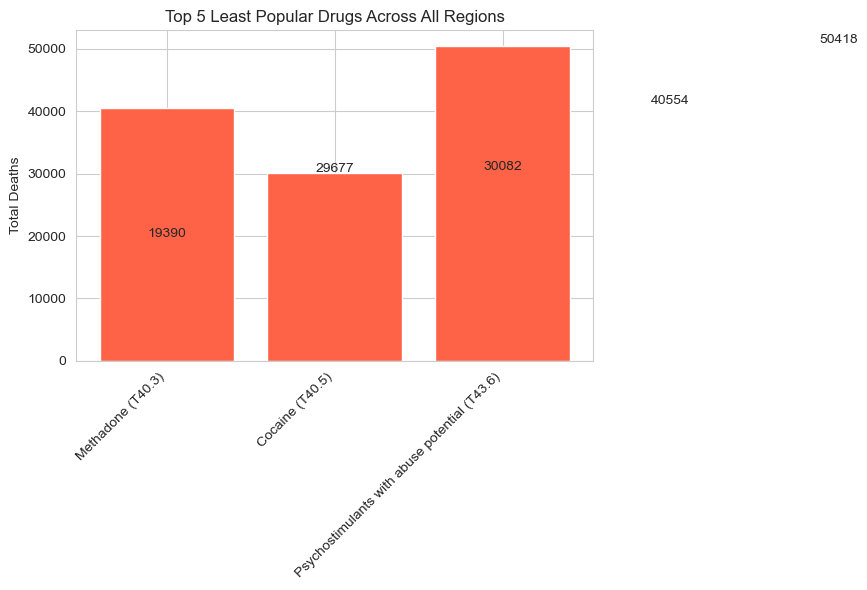

In [ ]:
# 1. Find the 5 least popular drugs overall
least_5 = region_drug_totals.sort_values("Deaths").head(5).reset_index(drop=True)
least_5["Deaths"] = least_5["Deaths"].astype(int)

print("=== 5 Least Popular Drugs (All Regions) ===")
display(least_5)

# 2. Visualize in bar chart
plt.figure(figsize=(10, 6))
plt.bar(least_5["Drug"], least_5["Deaths"], color="tomato")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Deaths")
plt.title("Top 5 Least Popular Drugs Across All Regions")

# Add labels above bars
for i, v in enumerate(least_5["Deaths"]):
    plt.text(i, v + 50, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()